# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris=datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [4]:
#print(iris.keys())
iris["filename"]

'iris.csv'

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
print(iris["filename"])

iris.csv


In [7]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(data, columns=iris['feature_names'])
x.head(10)

NameError: name 'data' is not defined

In [ ]:
Y=iris.target
print(Y.shape)
print(Y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
x=pd.DataFrame(iris.data,columns=iris["feature_names"])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
print("target_names:"+str(iris["target_names"]))

target_names:['setosa' 'versicolor' 'virginica']


In [ ]:
y=pd.DataFrame(iris["target"],columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris_data=pd.concat([x,y],axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_data=iris_data[["sepal length (cm)","petal length (cm)","target"]]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [ ]:
iris_data=iris_data[iris_data["target"].isin([0,1])]
print(iris['data'].size/len(iris["feature_names"]))

150.0


In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data[["sepal length (cm)","petal length (cm)"]]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


In [ ]:
iris_data[["target"]]

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [ ]:
iris_data["petal length (cm)"]

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
     ... 
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), Length: 100, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris_data[["sepal length (cm)","petal length (cm)"]],iris_data[["target"]],test_size=0.2)
x_train

,sepal length (cm),petal length (cm)
33,5.5,1.4
28,5.2,1.4
15,5.7,1.5
34,4.9,1.5
95,5.7,4.2
...,...,...
23,5.1,1.7
71,6.1,4.0
7,5.0,1.5
24,4.8,1.9


In [ ]:
y_test.shape

(20, 1)

In [ ]:
y_train.shape

(80, 1)

In [ ]:
y_train.mean()

target    0.5125
dtype: float64

y_train.head()

In [ ]:
y

In [ ]:
iris_data["target"]

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(y_train)
print(sc.mean_)

[0.5125]


In [11]:
y=pd.DataFrame(iris["target"],columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 切分訓練集與測試集
> train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train.head()

,sepal length (cm),petal length (cm)
43,5.0,1.6
35,5.0,1.2
68,6.2,4.5
14,5.8,1.2
23,5.1,1.7


In [ ]:
X_test.head()

,sepal length (cm),petal length (cm)
39,5.1,1.5
81,5.5,3.7
15,5.7,1.5
80,5.5,3.8
73,6.1,4.7


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [ ]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [ ]:
def norm_stats(dfs):
    minimum=np.min(dfs)
    maximum=np.max(dfs)
    mu=np.mean(dfs)
    sigma=np.std(dfs)
    return(minimum,maximum,mu,sigma)

In [ ]:
dfs=[1,2,3,4,5]
print(norm_stats(dfs))

(1, 5, 3.0, 1.4142135623730951)


In [ ]:
import pandas as pd
def z_score(col,mean,max_val,min_val,std_dev):
    df=pd.DataFrame()
    for c in col.columns:
        df[c]=(col[c]-mean[c]) / std_dev[c]
    return df

data=pd.DataFrame({
    "column1":[10,20,30,40,50],
    "column2":[5,15,25,35,45]
    
})  
mean_values = data.mean()
max_values = data.max()
min_values = data.min() 
std_dev_values = data.std()

cols_to_normalize =data[["column1", "column2"]]
normalized_data=z_score(cols_to_normalize, mean_values, max_values, min_values, std_dev_values)
print(normalized_data)


    column1   column2
0 -1.264911 -1.264911
1 -0.632456 -0.632456
2  0.000000  0.000000
3  0.632456  0.632456
4  1.264911  1.264911


In [ ]:
data.mean()

column1    30.0
column2    25.0
dtype: float64

In [ ]:
stats = norm_stats(x_train)
arr_x_train = np.array(z_score(x_train, stats))
arr_y_train = np.array(y_train)
arr_x_train[:5]

/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[ 0.01169246, -1.04768406],
       [-0.45600608, -1.04768406],
       [ 0.32349149, -0.97801263],
       [-0.92370463, -0.97801263],
       [ 0.32349149,  0.90311585]])

In [ ]:
stats

(sepal length (cm)    4.3
 petal length (cm)    1.0
 dtype: float64,
 sepal length (cm)    7.0
 petal length (cm)    5.1
 dtype: float64,
 sepal length (cm)    5.49250
 petal length (cm)    2.90375
 dtype: float64,
 sepal length (cm)    0.641439
 petal length (cm)    1.435309
 dtype: float64)

## use sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.4925  2.90375]
[0.64143881 1.43530866]


In [ ]:
x_train

,sepal length (cm),petal length (cm)
33,5.5,1.4
28,5.2,1.4
15,5.7,1.5
34,4.9,1.5
95,5.7,4.2
...,...,...
23,5.1,1.7
71,6.1,4.0
7,5.0,1.5
24,4.8,1.9


In [ ]:
#transform: (x-u)/std.
X_train_std = sc.transform(x_train)
X_train_std[:5]

array([[ 0.01169246, -1.04768406],
       [-0.45600608, -1.04768406],
       [ 0.32349149, -0.97801263],
       [-0.92370463, -0.97801263],
       [ 0.32349149,  0.90311585]])

In [ ]:
X_train_std

array([[ 0.01169246, -1.04768406],
       [-0.45600608, -1.04768406],
       [ 0.32349149, -0.97801263],
       [-0.92370463, -0.97801263],
       [ 0.32349149,  0.90311585],
       [-0.14420705, -0.83866978],
       [ 0.94708956,  1.25147298],
       [-0.6119056 , -0.97801263],
       [ 0.94708956,  1.25147298],
       [-1.23550366, -1.11735549],
       [ 1.4147881 ,  1.11213013],
       [ 2.03838616,  1.3211444 ],
       [ 1.88248665,  1.46048726],
       [-0.92370463, -0.97801263],
       [-0.14420705, -0.97801263],
       [-0.92370463, -1.04768406],
       [ 0.32349149,  0.41541587],
       [ 0.16759198,  1.11213013],
       [ 0.79119004,  1.53015868],
       [ 1.4147881 ,  0.97278728],
       [ 0.01169246,  0.763773  ],
       [ 0.79119004,  0.763773  ],
       [-1.07960414, -0.90834121],
       [ 1.10298907,  1.11213013],
       [-0.76780511, -0.90834121],
       [ 0.47939101,  0.763773  ],
       [-0.6119056 ,  0.06705875],
       [ 1.88248665,  1.25147298],
       [-0.76780511,

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [ ]:
X_test_std = sc.transform(x_test)
print(X_test_std[:15])

[[-1.07960414 -1.04768406]
 [-1.54730269 -1.11735549]
 [-0.45600608 -0.97801263]
 [ 0.01169246  0.62443015]
 [ 1.72658713  1.0424587 ]
 [-1.07960414 -1.04768406]
 [-0.30010657 -0.97801263]
 [ 0.16759198  0.90311585]
 [-0.14420705 -0.97801263]
 [-0.92370463  0.27607302]
 [-1.70320221 -1.11735549]
 [-0.14420705 -1.11735549]
 [-0.76780511 -1.18702691]
 [-0.76780511 -1.04768406]
 [-0.76780511 -0.90834121]]


you can also use fit_transform method (i.e., fit and then transform)    

In [ ]:
X_train_std = sc.fit_transform(x_train)  
X_test_std = sc.fit_transform(x_test)
print(X_test_std[:10])


[[-0.94493214 -0.88516183]
 [-1.42951272 -0.95377903]
 [-0.29882469 -0.81654463]
 [ 0.18575589  0.76165088]
 [ 1.96255136  1.17335405]
 [-0.94493214 -0.88516183]
 [-0.13729783 -0.81654463]
 [ 0.34728275  1.03611966]
 [ 0.02422903 -0.81654463]
 [-0.78340528  0.4185649 ]]


In [ ]:
X_train_std=sc.fit_transform(x_train)
X_test_std=sc.fit_transform(x_test)
print(X_test_std[:5])

[[-0.94493214 -0.88516183]
 [-1.42951272 -0.95377903]
 [-0.29882469 -0.81654463]
 [ 0.18575589  0.76165088]
 [ 1.96255136  1.17335405]]


In [ ]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 0.9999999999999999


In [ ]:
print(np.round(X_train_std.mean(),4))
print(X_train_std.std())

-0.0
0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.26082357749494
29.359813735350755


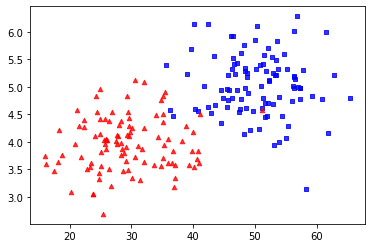

In [ ]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

49.45693833518996
29.90957268933021


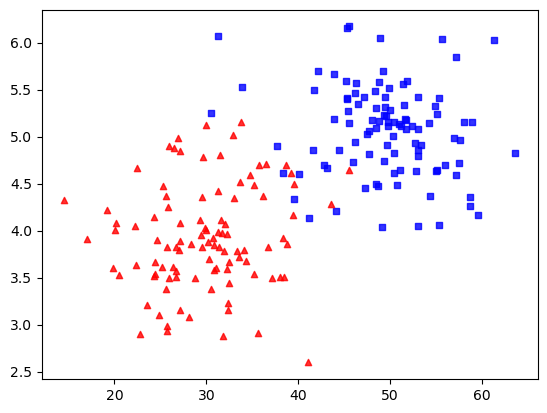

In [ ]:
x1=np.random.normal(50,6,100)
y1=np.random.normal(5,0.5,100)
x2=np.random.normal(30,6,100)
y2=np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c="b",marker="s",s=20,alpha=0.8)
plt.scatter(x2,y2,c="r",marker="^",s=20,alpha=0.8)
print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [ ]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape
x_val

array([53.35327916, 58.73546505, 45.50524186, 40.06026142, 51.69606404,
       55.31943562, 37.70566966, 48.6547803 , 51.47857488, 53.00383286,
       51.42886074, 48.03575845, 45.93213067, 49.35007863, 46.22897979,
       49.46310733, 45.25774437, 53.0654764 , 46.51426067, 52.42559347,
       49.1323442 , 54.30799053, 54.87849991, 33.83489179, 57.57147292,
       47.66080173, 50.43196149, 48.3671078 , 63.62355902, 49.53906985,
       41.66396438, 51.10944363, 55.59994538, 55.11565379, 52.85872739,
       48.50120411, 55.29804184, 45.15502052, 57.49456118, 31.31794334,
       49.81878409, 51.7500005 , 55.02139151, 50.75809251, 53.0475402 ,
       50.0267283 , 51.18468145, 61.35760949, 46.17498064, 49.24367356,
       48.85802592, 46.25950204, 45.35082432, 56.89859624, 41.20454501,
       55.93794824, 57.18166227, 47.74477232, 51.80385202, 48.42935796,
       57.15815027, 50.36195702, 51.59601918, 58.02968974, 58.70329195,
       48.75014455, 49.82683756, 45.37216784, 49.30301174, 47.20

In [ ]:
x_val=np.concatenate((x1,x2))
y_val=np.concatenate((y1,y2))
x_val.shape

(200,)

In [ ]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [ ]:
def minmax_norm(X):
    return (X-X.min(axis=0))/((X.max(axis=0)-X.min(axis=0)))

In [ ]:
minmax_norm(x_val[:10])

array([0.12277553, 0.93183879, 0.56269276, 0.31105516, 0.34768417,
       0.17620994, 0.        , 0.09094066, 0.15955258, 1.        ])

In [ ]:
minmax_norm(x_val[:20])

array([0.74406856, 1.        , 0.37088198, 0.11196456, 0.66526536,
       0.8375624 , 0.        , 0.52064751, 0.65492341, 0.72745183,
       0.65255942, 0.49121204, 0.39118122, 0.55371005, 0.40529686,
       0.55908474, 0.35911309, 0.73038308, 0.41886242, 0.69995564])

In [ ]:
x_val=x_val.reshape(-1, 1)
print(x_val)

[[53.35327916]
 [58.73546505]
 [45.50524186]
 [40.06026142]
 [51.69606404]
 [55.31943562]
 [37.70566966]
 [48.6547803 ]
 [51.47857488]
 [53.00383286]
 [51.42886074]
 [48.03575845]
 [45.93213067]
 [49.35007863]
 [46.22897979]
 [49.46310733]
 [45.25774437]
 [53.0654764 ]
 [46.51426067]
 [52.42559347]
 [49.1323442 ]
 [54.30799053]
 [54.87849991]
 [33.83489179]
 [57.57147292]
 [47.66080173]
 [50.43196149]
 [48.3671078 ]
 [63.62355902]
 [49.53906985]
 [41.66396438]
 [51.10944363]
 [55.59994538]
 [55.11565379]
 [52.85872739]
 [48.50120411]
 [55.29804184]
 [45.15502052]
 [57.49456118]
 [31.31794334]
 [49.81878409]
 [51.7500005 ]
 [55.02139151]
 [50.75809251]
 [53.0475402 ]
 [50.0267283 ]
 [51.18468145]
 [61.35760949]
 [46.17498064]
 [49.24367356]
 [48.85802592]
 [46.25950204]
 [45.35082432]
 [56.89859624]
 [41.20454501]
 [55.93794824]
 [57.18166227]
 [47.74477232]
 [51.80385202]
 [48.42935796]
 [57.15815027]
 [50.36195702]
 [51.59601918]
 [58.02968974]
 [58.70329195]
 [48.75014455]
 [49.82683

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1,1)
scaler=MinMaxScaler().fit(x_val)
print(scaler.data_max_)
print(scaler.transform(x_val)[:20])


[63.62355902]
[[0.79070414]
 [0.90038657]
 [0.63077065]
 [0.51980855]
 [0.7569321 ]
 [0.83077203]
 [0.47182482]
 [0.69495443]
 [0.75249994]
 [0.78358285]
 [0.75148683]
 [0.68233951]
 [0.63947013]
 [0.70912376]
 [0.64551955]
 [0.71142715]
 [0.62572695]
 [0.78483907]
 [0.65133323]
 [0.77179903]]
